# 05. Estimating Counts
## The Train Problem

    A railroad numbers its locomotives in order 1..N. One day you see a locomotive with
    the number 60. Estimate how many locomotives the railroad has.
    
Two questions for Bayesian reasoning
- What did we know about N before we saw the data? **Prior**
- For any given value of N, what is the likelihood of seeing this data (i.e. 60)? **Likelihood**

#### Prior
No further info, so choose uniform between 1..1000.

In [31]:
import numpy as np
from empiricaldist import Pmf
from matplotlib import pyplot as plt

In [7]:
hypos = np.arange(1,1001)
prior = Pmf(1,hypos)
prior.normalize()

1000

In [6]:
def update_train(pmf,data):
    hypos = pmf.qs
    likelihood = 1/ hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0

    pmf *= likelihood
    pmf.normalize()
    

In [8]:
# test
data = 60
posterior = prior.copy()
update_train(posterior, data)

<AxesSubplot:>

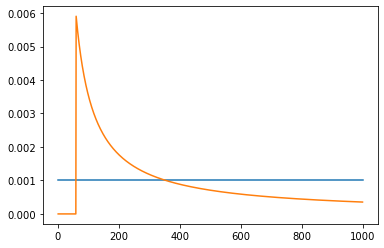

In [9]:
prior.plot()
posterior.plot()

In [12]:
posterior.max_prob()

60

This does not look like a good guess! Alternatively compute the mean of the posterior. The mean minimizes the mean squared error in the long run.

In [14]:
np.sum(posterior.qs * posterior.ps)
# or
posterior.mean()

333.4198932637079

## Sensitivity to Prior


In [36]:
def compute_postmean(n, data):
    prior = Pmf(1,np.arange(1,n+1))
    for d in data:
        update_train(prior,d)
    return prior.mean()

In [38]:
compute_postmean(500,[60])

207.0792279834105

In [40]:
ns = np.arange(100,3001,100)
means = [compute_postmean(nn,[60]) for nn in ns]

Text(0, 0.5, 'mean')

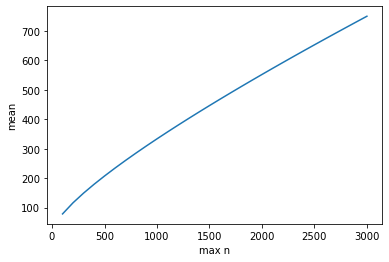

In [41]:
plt.plot(ns,means)
plt.xlabel('max n')
plt.ylabel('mean')

As we can see, the mean of the posterior is directly dependend on the **prior**!. We can try two ways to proceed

### 1. Get more data
Maybe we can observe more trains, e.g. 60,30,90

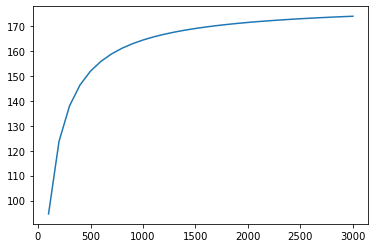

In [43]:
means_3t = [compute_postmean(nn,[60,30,90]) for nn in ns]
plt.plot(ns,means_3t)